In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
%matplotlib inline 

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [43]:
df = pd.read_csv('fifa_short.csv')
df

,Unnamed: 0,overall_rating,potential,international_reputation(1-5),value_euro
0,0,94,94,5,110500000.0
1,1,88,89,3,69500000.0
2,2,88,91,4,73000000.0
3,3,88,88,3,62000000.0
4,4,88,91,3,60000000.0
...,...,...,...,...,...
17694,17949,67,70,1,975000.0
17695,17950,59,67,1,190000.0
17696,17951,59,67,1,170000.0
17697,17952,59,71,1,280000.0


In [44]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,overall_rating,potential,international_reputation(1-5),value_euro
0,94,94,5,110500000.0
1,88,89,3,69500000.0
2,88,91,4,73000000.0
3,88,88,3,62000000.0
4,88,91,3,60000000.0
...,...,...,...,...
17694,67,70,1,975000.0
17695,59,67,1,190000.0
17696,59,67,1,170000.0
17697,59,71,1,280000.0


In [45]:
df.describe()

,overall_rating,potential,international_reputation(1-5),value_euro
count,17699.000000,17699.000000,17699.000000,1.769900e+04
mean,66.225662,71.449686,1.111984,2.479280e+06
std,6.974595,6.134616,0.393044,5.687014e+06
min,47.000000,50.000000,1.000000,1.000000e+04
25%,62.000000,67.000000,1.000000,3.250000e+05
50%,66.000000,71.000000,1.000000,7.000000e+05
75%,71.000000,75.000000,1.000000,2.100000e+06
max,94.000000,95.000000,5.000000,1.105000e+08


In [46]:
df

,overall_rating,potential,international_reputation(1-5),value_euro
0,94,94,5,110500000.0
1,88,89,3,69500000.0
2,88,91,4,73000000.0
3,88,88,3,62000000.0
4,88,91,3,60000000.0
...,...,...,...,...
17694,67,70,1,975000.0
17695,59,67,1,190000.0
17696,59,67,1,170000.0
17697,59,71,1,280000.0


(0.0, 116500020.1075609)

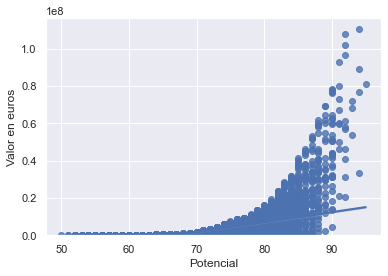

In [47]:
sns.set_theme(color_codes=True)
graph_potential = sns.regplot(x="potential", y="value_euro", data=df)
graph_potential.set(xlabel='Potencial', ylabel='Valor en euros')
plt.ylim(0,)

(0.0, 116417012.18097347)

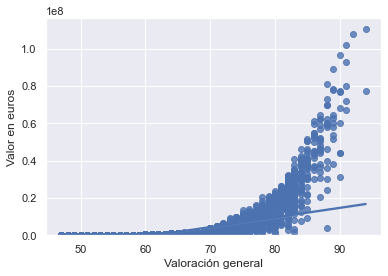

In [48]:
graph_overall_rating = sns.regplot(x="overall_rating", y="value_euro", data=df)
graph_overall_rating.set(xlabel='Valoración general', ylabel='Valor en euros')
plt.ylim(0,)

Como la variable *international_reputation(1-5)* es categórica, tendrémos que emplear el gráfico de cajas para poder apreciar la distribución de la variable dependiente en relación al puntaje de la *reputación internacional (1) al (5)*

<AxesSubplot:xlabel='international_reputation(1-5)', ylabel='value_euro'>

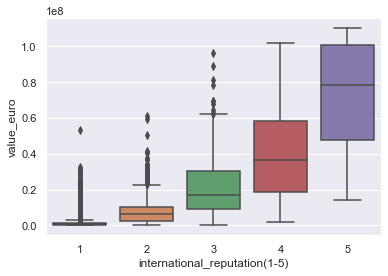

In [49]:
sns.boxplot(x="international_reputation(1-5)", y="value_euro", data=df)

In [50]:
coeficiente_pearson, valor_p = stats.pearsonr(df['overall_rating'], df['value_euro'])
print("El coeficiente de la Correlación de Pearson es %.2f" % coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.63  con un valor de P = 0.0


Almacenamiento de las variables independientes en un unico arreglo numpy "X"

In [51]:
X = df[['overall_rating','potential','international_reputation(1-5)']].values
X

array([[94, 94,  5],
       [88, 89,  3],
       [88, 91,  4],
       ...,
       [59, 67,  1],
       [59, 71,  1],
       [59, 75,  1]], dtype=int64)

Almacenamiento de la variable dependientes en un unico arreglo numpy "y"

In [52]:
y = df[['value_euro']].values
y

array([[1.105e+08],
       [6.950e+07],
       [7.300e+07],
       ...,
       [1.700e+05],
       [2.800e+05],
       [3.250e+05]])

## Enfoque Train/Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [54]:
print( 'X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test: ', X_test.shape, 'y_test: ', y_test.shape)

X_train:  (13274, 3) y_train:  (13274, 1) X_test:  (4425, 3) y_test:  (4425, 1)


Vamos a aplicar regresión lineal

In [55]:
lr = LinearRegression()

Entrenando el modelo con el 75% del dataset, valor por defecto cuando no le indicamos *train_test_split* el valor que tendrá *test_size*  

In [56]:
lr.fit(X_train[:,:2], y_train)

LinearRegression()

Almacenando los valores pronosticados por nuestro modelo en el arreglo *lr_y_pred* usando el dataset de pruebas X_test

In [57]:
lr_y_pred = lr.predict(X_test[:,:2])

Obteniendo los coeficientes de la ecuación de regresión lineal múltiple  
$\text{ \ }Y_{i}=\beta_{0}+\beta_{1}X_{i1}+\cdots+\beta
_{k}X_{ik}+\varepsilon_{i}$

In [58]:
d = [ ["Intercepto", lr.intercept_],           
     ["Coeficientes",  np.round(lr.coef_, 2)] ]         

print(tabulate(d, headers=["Evaluación", "Resultados"]))

Evaluación    Resultados
------------  -----------------------
Intercepto    [-40710780.58061466]
Coeficientes  [[359330.92 271862.45]]


Ahora podemos comparar los **valores reales (y_test)** con los **valores pronosticados (lr_y_pred)** y obtener los parámetros de las distintas mediciones del error y precisión.

In [59]:
d = [ ["MAE Error medio absoluto", np.round( mean_absolute_error(y_test, lr_y_pred), 2 )],
     ["MSE Error Cuadrático Medio", np.round( mean_squared_error(y_test, lr_y_pred), 2 )],
     ["RMSE Raíz del Error Cuadrático Medio", np.round( np.sqrt( mean_squared_error(y_test, lr_y_pred) ), 2)],
     #["Coeficiente de determinación",  r2_score(y_test, lr_y_pred)],
     ["Coeficiente de determinación R2", lr.score(X_test[:,:2], y_test)] ]

print(tabulate(d, headers=["Evaluación", "Resultados"]))

Evaluación                              Resultados
------------------------------------  ------------
MAE Error medio absoluto               2.23032e+06
MSE Error Cuadrático Medio             1.64599e+13
RMSE Raíz del Error Cuadrático Medio   4.05708e+06
Coeficiente de determinación R2        0.459975


Notamos que los valores de $R^2$ son muy bajos, menor al 0.5, así que debemos aplicar otro modelo que se ajuste mejor a la distribución de los datos.


## Regresión Polinomial
Notamos que la gráfica tiene una tendencía a la alza a medida que aumenta las variables independientes, y esta se hace mas pronunciada a medida que los valores son mas grandes, por ello usaremos la regresión polinomial para ajustar mejor la precisión del modelo. 
 
$\widehat{Y}=\alpha+\beta_{1}X+\beta_{2}X^2+\beta_{3}X^3+\cdots$

In [60]:
# Usaremos polinomios de grado 2
poly_fea = PolynomialFeatures(degree=2) 

In [61]:
X_train[:,:2]

array([[70, 81],
       [51, 63],
       [64, 69],
       ...,
       [70, 70],
       [63, 68],
       [58, 59]], dtype=int64)

Normalizando los datos

In [62]:
X_train_2c = X_train[:,:2]
X_t2c_normal = poly_fea.fit_transform(X_train_2c)
X_t2c_normal = X_t2c_normal.astype(float)

In [63]:
Entrada=[('normalizar', StandardScaler()), ('polinomio', PolynomialFeatures(include_bias=False)), ('modelo',LinearRegression())]

In [64]:
pipeline = Pipeline(Entrada)
pipeline

Pipeline(steps=[('normalizar', StandardScaler()),
                ('polinomio', PolynomialFeatures(include_bias=False)),
                ('modelo', LinearRegression())])

In [65]:
pipeline.fit(X_t2c_normal, y_train)

Pipeline(steps=[('normalizar', StandardScaler()),
                ('polinomio', PolynomialFeatures(include_bias=False)),
                ('modelo', LinearRegression())])

In [66]:
X_test_2c = X_test[:,:2]
X_test_2c_n = poly_fea.fit_transform(X_test_2c)
X_test_2c_n = X_test_2c_n.astype(float)

Valores pronosticados para el dataset de pruebas *y_test*

In [67]:
pf_y_pred = pipeline.predict(X_test_2c_n)
pf_y_pred

array([[  36628.],
       [1111220.],
       [3717972.],
       ...,
       [ 611220.],
       [ 887124.],
       [ 373524.]])

In [68]:
print('R2: %.2f' % r2_score(y_test, pf_y_pred))

R2: 0.94


Ecuación de la Regresión Polinómica: 
$\widehat{Y}=\alpha+\beta_{1}X+\beta_{2}X^2+\beta_{3}X^3+\cdots$

In [69]:
d = [ ["Intercepto", lr.intercept_],           
     ["Coeficientes",  np.round(lr.coef_, 2)] ]         

print(tabulate(d, headers=["Evaluación", "Resultados"]))

Evaluación    Resultados
------------  -----------------------
Intercepto    [-40710780.58061466]
Coeficientes  [[359330.92 271862.45]]


In [70]:
d = [ ["MAE Error medio absoluto", np.round( mean_absolute_error(y_test, pf_y_pred), 2 )],
     ["MSE Error Cuadrático Medio", np.round( mean_squared_error(y_test, pf_y_pred), 2 )],
     ["RMSE Raíz del Error Cuadrático Medio", np.round( np.sqrt( mean_squared_error(y_test, pf_y_pred) ), 2)],
     ["Coeficiente de determinación R2",  r2_score(y_test, pf_y_pred)] ]

print(tabulate(d, headers=["Evaluación", "Resultados"]))

Evaluación                                  Resultados
------------------------------------  ----------------
MAE Error medio absoluto              507897
MSE Error Cuadrático Medio                 1.76156e+12
RMSE Raíz del Error Cuadrático Medio       1.32724e+06
Coeficiente de determinación R2            0.942206


In [71]:
R_cruce = cross_val_score(lr, X_test_2c, y_test, cv=4)
R_cruce_Poly = cross_val_score(pipeline, X_test_2c, y_test, cv=4)
print("Validación cruzada (4 pliegues): ")
print("-------------------------------")
print("Regresión Lineal:     Iteración promedio: %.2f" % R_cruce.mean() )
print("Regresión Polinomial: Iteración promedio: %.2f" % R_cruce_Poly.mean() )

Validación cruzada (4 pliegues): 
-------------------------------
Regresión Lineal:     Iteración promedio: 0.46
Regresión Polinomial: Iteración promedio: 0.82
